In [1250]:
import numpy as np
import random
import matplotlib.pyplot as pl

Neural network model
	3
1
	4	6
2
	5

In [1251]:
class Neuron:
  def __init__(self, id, next_nodes):
    self.id = id
    self.learning_rate = 0.00000001
    self.next_nodes = next_nodes
    self.bias = random.uniform(0.1, 1)
    self.lastValue = 0

    # Setting weight to default
    self.weights = {}
    if next_nodes is None:
      self.weights = {}
    else:
      for idx in range(len(next_nodes)):
        self.weights[next_nodes[idx]] = random.uniform(0.1, 1)

  def feedforward(self, value, nextNodeIdx):
    self.lastValue = value
    if nextNodeIdx is not None:
      return self.ReLU(value * self.weights[nextNodeIdx] + self.bias)
    else: # Last node
      return self.ReLU(value + self.bias)

  def backpropogate(self, loss):
    for weightKey in self.weights.keys():
      self.weights[weightKey] = self.weights[weightKey] + self.learning_rate * loss * self.lastValue * (1.0 - self.lastValue)

  def get_id(self):
    return self.id

  def ReLU(self, value):
    self.lastValue = value
    return np.maximum(0, value)

In [1252]:
class NeuralNetwork:
  def __init__(self, layout):
    self.layout = layout
    self.NeuralMap = {}

    self.number_of_nodes = 0

    # Number of nodes in total
    for col in range(len(layout)):
      self.number_of_nodes += layout[col]

    # Spliting node names into layers
    idx = 0
    self.split_layers = {}
    self.to_which_layer_belong = {}
    for col in range(len(layout)):
      self.split_layers[col] = []

      for row in range(layout[col]):
        self.split_layers[col].append(idx)
        self.to_which_layer_belong[idx] = col
        idx += 1

    # Creating nodes
    self.split_layers[len(layout)] = None
    for idx in range(self.number_of_nodes):
      self.NeuralMap[self.number_of_nodes - idx - 1] = Neuron(self.number_of_nodes - idx - 1, self.split_layers[self.to_which_layer_belong[self.number_of_nodes - idx - 1] + 1])

  def feedforward(self, data):
    values = {}

    # Copying from data to values dictionary
    for i in range(len(data)):
      values[i] = data[i]

    # For each source collumn
    for colIdx in range(len(self.layout) - 1):
      # For each source row
      for rowIdx in range(self.layout[colIdx]):
        # Fir each target in next collumn
        for nextColRowIdx in range(self.layout[colIdx + 1]):
          values[self.split_layers[colIdx + 1][nextColRowIdx] + len(data)] = self.NeuralMap[rowIdx + colIdx * (len(self.layout) - 1)].feedforward(rowIdx, self.split_layers[colIdx + 1][nextColRowIdx])

    return self.NeuralMap[len(self.NeuralMap) - 1].feedforward(values[len(values)], None)

  def backpropogate(self, data, target):
    output = self.feedforward(data)
    loss = (output - target)**2

    for neuronIdx in self.NeuralMap:
      self.NeuralMap[neuronIdx].backpropogate(loss)

    return loss

  def __str__(self):
    res = ''

    for layerIdx in range(len(self.layout)):
      res += '{} layer'.format(layerIdx + 1)
      res += '\n'

      res += str(self.split_layers[layerIdx])
      res += '\n'

    return res

In [1253]:
nn = NeuralNetwork([2, 4, 1])

loss_history = []

for idx in range(10000):
  loss = nn.backpropogate([25, 1], 1)
  loss_history.append(loss)
  print("Epoch {} Loss: {}".format(idx, loss))

Streaming output truncated to the last 5000 lines.
Epoch 5000 Loss: 0.034174848086099205
Epoch 5001 Loss: 0.03417484810222037
Epoch 5002 Loss: 0.03417484811834154
Epoch 5003 Loss: 0.0341748481344627
Epoch 5004 Loss: 0.034174848150583866
Epoch 5005 Loss: 0.03417484816670503
Epoch 5006 Loss: 0.0341748481828262
Epoch 5007 Loss: 0.034174848198947366
Epoch 5008 Loss: 0.03417484821506853
Epoch 5009 Loss: 0.0341748482311897
Epoch 5010 Loss: 0.03417484824731086
Epoch 5011 Loss: 0.03417484826343203
Epoch 5012 Loss: 0.034174848279553194
Epoch 5013 Loss: 0.03417484829567436
Epoch 5014 Loss: 0.03417484831179553
Epoch 5015 Loss: 0.034174848327916695
Epoch 5016 Loss: 0.03417484834403786
Epoch 5017 Loss: 0.03417484836015902
Epoch 5018 Loss: 0.03417484837628019
Epoch 5019 Loss: 0.034174848392401355
Epoch 5020 Loss: 0.03417484840852252
Epoch 5021 Loss: 0.03417484842464369
Epoch 5022 Loss: 0.034174848440764856
Epoch 5023 Loss: 0.03417484845688602
Epoch 5024 Loss: 0.03417484847300718
Epoch 5025 Loss: 0.0

In [1254]:
print(nn)

0 layer
[0, 1]
1 layer
[2, 3, 4, 5]
2 layer
[6]



<function matplotlib.pyplot.show>

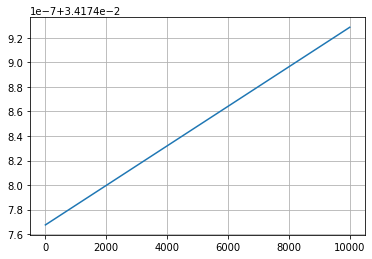

In [1255]:
plt.plot(np.arange(0, len(loss_history), 1), loss_history)
plt.grid()
plt.show

In [1256]:
nn.feedforward([25, 1])

1.1848646226083297